# **Objective**

Students will choose a traffic-related project and implement a deep learning model to address the problem. This project will allow students to apply their knowledge of neural networks, including the selection and implementation of the most appropriate model.

# **Project Overview**

The goal is to create a model that can effectively solve a traffic-related problem (e.g., traffic sign recognition, vehicle detection, traffic flow analysis) using a chosen dataset. Students will be responsible for the entire workflow, from data collection and preprocessing to model selection, implementation, and evaluation.
Project Tasks:

# **• Task 1:** Project Idea Selection and Dataset Collection

- Chooseatraffic-relatedproject(e.g.,trafficsignrecognition,vehicle detection, traffic flow analysis).
- Gatherthedataeitherbyobtaininganexistingdatasetorbyscrapingdata online.
Storethecollecteddatainadatabase(e.g.,SQLite,MongoDB).
- Explorethedatasetandunderstanditsstructure.
Performdatapreprocessingstepssuchasresizing,normalization,anddata augmentation.
Splitthedatasetintotraining,validation,andtestsets.
# **• Task 2:** Model Selection and Implementation

- Basedonyourprojectrequirements,selectthemostsuitabledeeplearning model (e.g., CNN, ANN, or any other deep learning model).
- Designandimplementtheselectedmodelusingadeeplearningframework such as TensorFlow or PyTorch.
Trainthemodelusingtheprepareddataset.
- Fine-tunehyperparameterssuchaslearningrate,batchsize,andthe number of epochs.
Trackmodelperformanceonthevalidationsetduringtraining.
# **• Task 3:** Model Evaluation and Reporting

- Evaluatethemodelonthetestsetusingperformancemetricsrelevantto your project.
- Compileallfindings,codesnippets,andresultsintoafinalreport.
- Prepareapresentationsummarizingtheproject,includingtheproblem statement, methodology, results, and conclusions.
- Deliverable: A notebook with the entire workflow (data collection, preprocessing, model selection, implementation, training, evaluation), a presentation slides.

# **Imports**

In [ ]:
import keras
from keras import layers
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import time

# **Load and Preprocess Data**

In [ ]:
%pip install opendatasets --upgrade

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/k1rsn7/dataset-for-classification-of-specialty-cars")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:   
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/k1rsn7/dataset-for-classification-of-specialty-cars


100%|██████████| 1.00G/1.00G [00:46<00:00, 22.9MB/s]


In [ ]:
# Input directories
input_base_dir = 'dataset-for-classification-of-specialty-cars/Dataset/'
categories = ['Rest', 'Spesial_car']

# Output directory
output_base_dir = 'dataset-for-classification-of-specialty-cars/Processed Dataset/'

# Create the output directories if they do not exist
for category in categories:
    os.makedirs(os.path.join(output_base_dir, category), exist_ok=True)

for category in categories:
    input_dir = os.path.join(input_base_dir, category)
    output_dir = os.path.join(output_base_dir, category)

    # List all files in the input directory
    files = os.listdir(input_dir)

    # Loop through each file in the input directory
    for file_name in files:
        if file_name.endswith('.jpg') or file_name.endswith('.jpeg') or file_name.endswith('.png'):
            # Open the image
            image_path = os.path.join(input_dir, file_name)
            image = Image.open(image_path)

            # Convert the image to RGB color mode
            image = image.convert('RGB')

            # Construct the output file path
            output_path = os.path.join(output_dir, file_name.split('.')[0] + '.png')

            # Save the image in PNG format
            image.save(output_path, 'PNG')


print("Conversion complete.")

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Conversion complete.


In [ ]:
image_size = (24, 24)
batch_size = 8

train_ds, valid_ds = keras.utils.image_dataset_from_directory(
    directory="/content/dataset-for-classification-of-specialty-cars/Dataset",
    labels="inferred",
    label_mode="int",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 3042 files belonging to 2 classes.
Using 2434 files for training.
Using 608 files for validation.


In [ ]:
image_size = (256, 256)
batch_size = 10


train_ds2, valid_ds2 = keras.utils.image_dataset_from_directory(
    directory="/content/dataset-for-classification-of-specialty-cars/Processed Dataset",
    labels="inferred",
    label_mode="int",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 2976 files belonging to 2 classes.
Using 2381 files for training.
Using 595 files for validation.


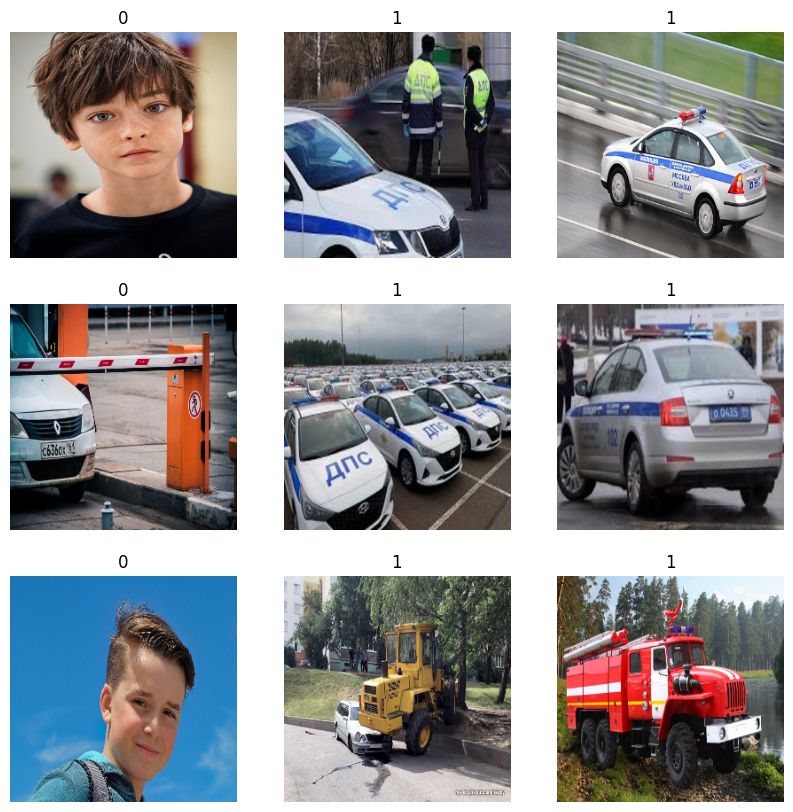

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds2.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

# **CNN**

In [ ]:
model_cnn = keras.Sequential([
    layers.Input(shape=(image_size[0], image_size[1], 3)),

    layers.Rescaling(1./255),

    layers.Conv2D(filters=32, kernel_size=3, padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(filters=48, kernel_size=3, padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(filters=64, kernel_size=3, padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(filters=64, kernel_size=3, padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(filters=64, kernel_size=3, padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    # ANN
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=16, activation='relu'),
    # Output
    layers.Dense(units=1, activation='sigmoid'),
])
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 48)        │          13,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 48)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          27,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         262,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 381,169 (1.45 MB)

 Trainable params: 381,169 (1.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_cnn.compile(
  optimizer='adam',
  loss=keras.losses.BinaryCrossentropy(),
  metrics=[keras.metrics.BinaryAccuracy()],
)

In [ ]:
model_cnn.fit(

    train_ds2,
    epochs=20,
    validation_data=valid_ds2,
)

Epoch 1/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 136s 532ms/step - binary_accuracy: 0.5936 - loss: 0.6834 - val_binary_accuracy: 0.7311 - val_loss: 0.5437
Epoch 2/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 146s 575ms/step - binary_accuracy: 0.7076 - loss: 0.5746 - val_binary_accuracy: 0.8101 - val_loss: 0.4239
Epoch 3/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 138s 564ms/step - binary_accuracy: 0.8129 - loss: 0.4051 - val_binary_accuracy: 0.8168 - val_loss: 0.3729
Epoch 4/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 141s 557ms/step - binary_accuracy: 0.8158 - loss: 0.3894 - val_binary_accuracy: 0.8269 - val_loss: 0.4388
Epoch 5/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 140s 549ms/step - binary_accuracy: 0.8224 - loss: 0.3739 - val_binary_accuracy: 0.8370 - val_loss: 0.4182
Epoch 6/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 142s 550ms/step - binary_accuracy: 0.8531 - loss: 0.3064 - val_binary_accuracy: 0.8655 - val_loss: 0.3383
Epoch 7/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 114s 477ms/step - binary_accuracy: 0.8889 - loss: 0.2586 - val_binary_accuracy: 0.84

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
This image is 26.89% Rest and 73.11% Special car.


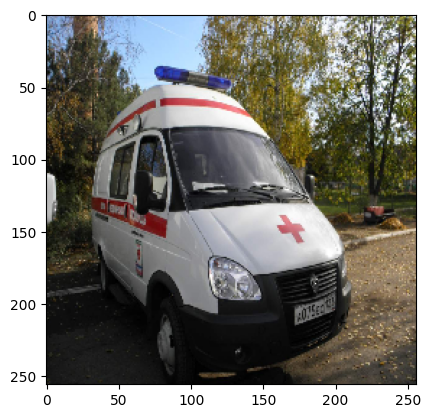

In [ ]:
img = keras.utils.load_img("/content/dataset-for-classification-of-specialty-cars/Processed Dataset/Spesial_car/00003.png", target_size=image_size)
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = keras.ops.expand_dims(img_array, 0)

predictions = model_cnn.predict(img_array)
score = float(keras.ops.sigmoid(predictions[0][0]))
print(f"This image is {100 * (1 - score):.2f}% Rest and {100 * score:.2f}% Special car.")

In [ ]:
loss_cnn, accuracy_cnn = model_cnn.evaluate(valid_ds2)
print(f'Validation Loss: {loss_cnn:.2f}')
print(f'Validation Accuracy: {accuracy_cnn:.2f}')

60/60 ━━━━━━━━━━━━━━━━━━━━ 37s 615ms/step - binary_accuracy: 0.9011 - loss: 0.4752
Validation Loss: 0.39
Validation Accuracy: 0.92


# **Validation Loss and Accuracy before Data Augmentation**

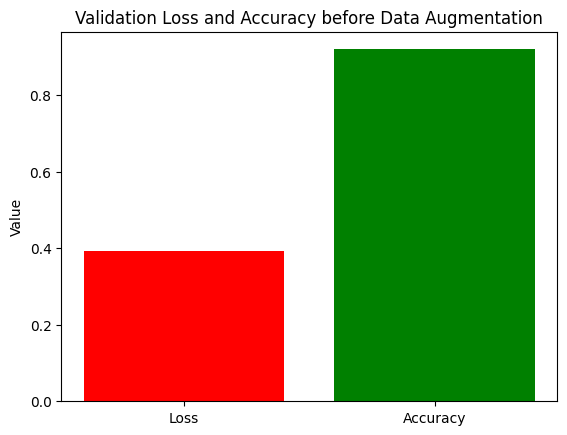

In [ ]:
plt.figure()
plt.bar(['Loss', 'Accuracy'], [loss_cnn, accuracy_cnn], color=['red', 'green'])
plt.title('Validation Loss and Accuracy before Data Augmentation')
plt.ylabel('Value')
plt.show()